损失函数：衡量模型输出与真实标签的差异  
损失函数、代价函数、目标函数

nn.CrossEntropyLoss  
功能：nn.LogSoftmax()与nn.NLLLoss()结合，进行交叉熵计算  
主要参数：  
* weight:各类别的loss设置权值  
* ignore_index:忽略某个类别  
* reduction:计算模式，可为none/sum/mean  
none 逐个元素计算  
sum 所有元素求和，返回标量  
mean 加权平均，返回标量  

交叉熵=信息熵+相对熵  

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [15]:
inputs = torch.tensor([[1, 2], [1, 3], [1, 3]], dtype=torch.float)
target = torch.tensor([0, 1, 1], dtype=torch.long)

In [8]:
loss_f_none = nn.CrossEntropyLoss(weight=None, reduction='none')
loss_f_sum = nn.CrossEntropyLoss(weight=None, reduction='sum')
loss_f_mean = nn.CrossEntropyLoss(weight=None, reduction='mean')

loss_none = loss_f_none(inputs, target)
loss_sum = loss_f_sum(inputs, target)
loss_mean = loss_f_mean(inputs, target)
loss_none, loss_sum, loss_mean

(tensor([1.3133, 0.1269, 0.1269]), tensor(1.5671), tensor(0.5224))

In [11]:
idx = 0
input_1 = inputs.detach().numpy()[idx]
target_1 = target.numpy()[idx]
x_class = input_1[target_1]
sigma_exp_x = np.sum(list(map(np.exp, input_1)))
log_sigma_exp_x = np.log(sigma_exp_x)
loss_1 = -x_class + log_sigma_exp_x
loss_1, x_class, input_1, target_1

(1.3132617, 1.0, array([1., 2.], dtype=float32), 0)

weight

In [12]:
weights = torch.tensor([1, 2], dtype=torch.float)
loss_f_none_w = nn.CrossEntropyLoss(weight=weights, reduction='none')
loss_f_sum = nn.CrossEntropyLoss(weight=weights, reduction='sum')
loss_f_mean = nn.CrossEntropyLoss(weight=weights, reduction='mean')
loss_none_w = loss_f_none_w(inputs, target)
loss_sum = loss_f_sum(inputs, target)
loss_mean = loss_f_mean(inputs, target)
weights, loss_none_w, loss_sum, loss_mean

(tensor([1., 2.]),
 tensor([1.3133, 0.2539, 0.2539]),
 tensor(1.8210),
 tensor(0.3642))

In [17]:
weights = torch.tensor([1, 2], dtype=torch.float)
weights_all = np.sum(list(map(lambda x: weights.numpy()[x], target.numpy())))
mean = 0
loss_sep = loss_none.detach().numpy()
for i in range(target.shape[0]):
    x_class = target.numpy()[i]
    tmp = loss_sep[i] * (weights.numpy()[x_class] / weights_all)
    mean += tmp
mean

0.3641947731375694

nn.NLLLoss  
功能：实现负对数似然函数中的负号功能  
主要参数：  
* weight:各类别的loss设置权值  
* ignore_index:忽略某个类别  
* reduction:计算模式，可为none/sum/mean  
none 逐个元素计算  
sum 所有元素求和，返回标量  
mean 加权平均，返回标量  

In [18]:
weights = torch.tensor([1, 1], dtype=torch.float)
loss_f_none_w = nn.NLLLoss(weight=weights, reduction='none')
loss_f_sum = nn.NLLLoss(weight=weights, reduction='sum')
loss_f_mean = nn.NLLLoss(weight=weights, reduction='mean')
loss_none_w = loss_f_none_w(inputs, target)
loss_sum = loss_f_sum(inputs, target)
loss_mean = loss_f_mean(inputs, target)
weights, loss_none_w, loss_sum, loss_mean

(tensor([1., 1.]), tensor([-1., -3., -3.]), tensor(-7.), tensor(-2.3333))

nn.BCELoss  
功能：二分类交叉熵  
注意事项：输入值取值在[0, 1]  
主要参数：  
* weight:各类别的loss设置权值  
* ignore_index:忽略某个类别  
* reduction:计算模式，可为none/sum/mean  
none 逐个元素计算  
sum 所有元素求和，返回标量  
mean 加权平均，返回标量  

In [19]:
inputs = torch.tensor([[1, 2], [2, 2], [3, 4], [4, 5]], dtype=torch.float)
target = torch.tensor([[1, 0], [1, 0], [0, 1], [0, 1]], dtype=torch.float)
target_bce = target
inputs = torch.sigmoid(inputs)
weights = torch.tensor([1, 1], dtype=torch.float)
loss_f_none_w = nn.BCELoss(weight=weights, reduction='none')
loss_f_sum = nn.BCELoss(weight=weights, reduction='sum')
loss_f_mean = nn.BCELoss(weight=weights, reduction='mean')
loss_none_w = loss_f_none_w(inputs, target_bce)
loss_sum = loss_f_sum(inputs, target_bce)
loss_mean = loss_f_mean(inputs, target_bce)
weights, loss_none_w, loss_sum, loss_mean

(tensor([1., 1.]),
 tensor([[0.3133, 2.1269],
         [0.1269, 2.1269],
         [3.0486, 0.0181],
         [4.0181, 0.0067]]),
 tensor(11.7856),
 tensor(1.4732))

In [21]:
idx = 0 
x_i = inputs.detach().numpy()[idx, idx]
y_i = target.numpy()[idx, idx]
l_i = -y_i * np.log(x_i) if y_i else -(1-y_i) * np.log(1-x_i)
inputs, l_i

(tensor([[0.7311, 0.8808],
         [0.8808, 0.8808],
         [0.9526, 0.9820],
         [0.9820, 0.9933]]),
 0.31326166)

nn.BCEWithLogitsLoss  
功能：结合Sigmoid与二分类交叉熵  
注意事项：网络最后不加sigmoid函数  
主要参数： 
* pos_weight:正样本的权值   
* weight:各类别的loss设置权值  
* ignore_index:忽略某个类别  
* reduction:计算模式，可为none/sum/mean  
none 逐个元素计算  
sum 所有元素求和，返回标量  
mean 加权平均，返回标量  

In [23]:
inputs = torch.tensor([[1, 2], [2, 2], [3, 4], [4, 5]], dtype=torch.float)
target = torch.tensor([[1, 0], [1, 0], [0, 1], [0, 1]], dtype=torch.float)
target_bce = target
weights = torch.tensor([1, 1], dtype=torch.float)
loss_f_none_w = nn.BCEWithLogitsLoss(weight=weights, reduction='none')
loss_f_sum = nn.BCEWithLogitsLoss(weight=weights, reduction='sum')
loss_f_mean = nn.BCEWithLogitsLoss(weight=weights, reduction='mean')
loss_none_w = loss_f_none_w(inputs, target_bce)
loss_sum = loss_f_sum(inputs, target_bce)
loss_mean = loss_f_mean(inputs, target_bce)
weights, loss_none_w, loss_sum, loss_mean


(tensor([1., 1.]),
 tensor([[0.3133, 2.1269],
         [0.1269, 2.1269],
         [3.0486, 0.0181],
         [4.0181, 0.0067]]),
 tensor(11.7856),
 tensor(1.4732))

In [25]:
inputs = torch.tensor([[1, 2], [2, 2], [3, 4], [4, 5]], dtype=torch.float)
target = torch.tensor([[1, 0], [1, 0], [0, 1], [0, 1]], dtype=torch.float)
target_bce = target
weights = torch.tensor([1, 1], dtype=torch.float)
pos_weight = torch.tensor([3], dtype=torch.float)
loss_f_none_w = nn.BCEWithLogitsLoss(weight=weights, reduction='none', pos_weight=pos_weight)
loss_f_sum = nn.BCEWithLogitsLoss(weight=weights, reduction='sum', pos_weight=pos_weight)
loss_f_mean = nn.BCEWithLogitsLoss(weight=weights, reduction='mean', pos_weight=pos_weight)
loss_none_w = loss_f_none_w(inputs, target_bce)
loss_sum = loss_f_sum(inputs, target_bce)
loss_mean = loss_f_mean(inputs, target_bce)
weights, loss_none_w, loss_sum, loss_mean

(tensor([1., 1.]),
 tensor([[0.9398, 2.1269],
         [0.3808, 2.1269],
         [3.0486, 0.0544],
         [4.0181, 0.0201]]),
 tensor(12.7158),
 tensor(1.5895))

nn.L1Loss  
功能：计算inputs与target之差的绝对值  
主要参数：  
* reduction:计算模式，可为none/sum/mean  
none 逐个元素计算  
sum 所有元素求和，返回标量  
mean 加权平均，返回标量  

In [26]:
inputs = torch.ones((2, 2))
target = torch.ones((2, 2)) * 3
loss_f = nn.L1Loss(reduction='none')
loss = loss_f(inputs, target)
inputs, target, loss

(tensor([[1., 1.],
         [1., 1.]]),
 tensor([[3., 3.],
         [3., 3.]]),
 tensor([[2., 2.],
         [2., 2.]]))

nn.MSELoss  
功能：计算inputs与target之差的平方  
主要参数：  
* reduction:计算模式，可为none/sum/mean  
none 逐个元素计算  
sum 所有元素求和，返回标量  
mean 加权平均，返回标量  

In [27]:
loss_f_mse = nn.MSELoss(reduction='none')
loss_mse = loss_f_mse(inputs, target)
loss_mse

tensor([[4., 4.],
        [4., 4.]])

nn.SmoothL1Loss  
功能：平滑的L1Loss  
主要参数：  
* reduction:计算模式，可为none/sum/mean  
none 逐个元素计算  
sum 所有元素求和，返回标量  
mean 加权平均，返回标量  

In [31]:
import matplotlib.pyplot as plt 
inputs = torch.linspace(-3, 3, steps=500)
target = torch.zeros_like(inputs)
loss_f = nn.SmoothL1Loss(reduction='none')
loss_smooth = loss_f(inputs, target)
loss_l1 = np.abs(inputs.numpy())
plt.plot(inputs.numpy(), loss_smooth.numpy(), label='Smooth L1 loss')
plt.plot(inputs.numpy(), loss_l1, label='L1 loss')
plt.xlabel('x_i - y_i')
plt.ylabel('loss value')
plt.legend()
plt.grid()
plt.show()

nn.PoissonNLLLoss  
功能：泊松分布的负对数似然损失函数  
主要参数：  
* log_input:输入是否为对数形式，决定计算公式  
* full:计算所有loss，默认为False  
* eps:修正项，避免log(input)为nan

In [32]:
inputs = torch.randn((2, 2))
target = torch.randn((2, 2))
loss_f = nn.PoissonNLLLoss(log_input=True, full=False, reduction='none')
loss = loss_f(inputs, target)
inputs, target, loss

(tensor([[-0.2377, -0.0878],
         [ 0.3068, -0.1647]]),
 tensor([[0.4251, 0.6699],
         [1.3395, 0.0519]]),
 tensor([[0.8895, 0.9748],
         [0.9481, 0.8567]]))

In [33]:
idx = 0
loss_1 = torch.exp(inputs[idx, idx]) - target[idx, idx] * inputs[idx, idx]
loss_1

tensor(0.8895)

nn.KLDivLoss  
功能：计算KLD(divergence),KL散度，相对熵  
注意事项：需提前将输入计算log-probabilities, 如通过nn.logsoftmax()  
主要参数：  
* reduction:none/sum/mean/batchmean  
batchmean-batchsize维度求平均值  
none 逐个元素计算  
sum 所有元素求和，返回标量  
mean 加权平均，返回标量  

In [39]:
inputs = torch.tensor([[0.5, 0.3, 0.2], [0.2, 0.3, 0.5]])
inputs_log = torch.log(inputs)
target = torch.tensor([[0.9, 0.05, 0.05], [0.1, 0.7, 0.2]], dtype=torch.float)
loss_f_none = nn.KLDivLoss(reduction='none')
loss_f_mean = nn.KLDivLoss(reduction='mean')
loss_f_sum = nn.KLDivLoss(reduction='sum')
loss_f_bs_mean = nn.KLDivLoss(reduction='batchmean')

loss_none = loss_f_none(inputs_log, target)
loss_mean = loss_f_mean(inputs_log, target)
loss_sum = loss_f_sum(inputs_log, target)
loss_bs_mean = loss_f_bs_mean(inputs_log, target)

loss_none, loss_mean, loss_sum, loss_bs_mean

(tensor([[ 0.5290, -0.0896, -0.0693],
         [-0.0693,  0.5931, -0.1833]]),
 tensor(0.1184),
 tensor(0.7106),
 tensor(0.3553))

In [40]:
idx = 0
loss_1 = target[idx, idx] * (torch.log(target[idx, idx])-torch.log(inputs[idx, idx]))
loss_1

tensor(0.5290)

nn.MarginRankingLoss  
功能：计算两个向量之间的相似度，用于排序任务  
特别说明：该方法计算两组数据之间的差异，返回一个n*n的loss矩阵  
主要参数：  
* margin:边界值，x1与x2之间的差异值  

In [41]:
x1 = torch.tensor([[1], [2], [3]], dtype=torch.float)
x2 = torch.tensor([[2], [2], [2]], dtype=torch.float)
target = torch.tensor([1, 1, -1], dtype=torch.float)
loss_f_none = nn.MarginRankingLoss(margin=0, reduction='none')
loss = loss_f_none(x1, x2, target)
loss

tensor([[1., 1., 0.],
        [0., 0., 0.],
        [0., 0., 1.]])

In [48]:
x = torch.tensor([[0.1, 0.2, 0.4, 0.8]])
y = torch.tensor([[0, 3, -1, -1]], dtype=torch.long)
loss_f = nn.MultiLabelMarginLoss(reduction='none')
loss = loss_f(x, y)
loss

tensor([0.8500])

In [49]:
x = x[0]
item_1 = (1 - (x[0] - x[1])) + (1 - (x[0] - x[2]))
item_2 = (1 - (x[3] - x[1])) + (1 - (x[3] - x[2]))
loss_h = (item_1 + item_2) / x.shape[0]
loss_h

tensor(0.8500)

nn.SoftMarginLoss  
功能：计算二分类的logistic损失  

In [50]:
inputs = torch.tensor([[0.3, 0.7], [0.5, 0.5]])
target = torch.tensor([[-1, 1], [1, -1]], dtype=torch.float)
loss_f = nn.SoftMarginLoss(reduction='none')
loss = loss_f(inputs, target)
loss

tensor([[0.8544, 0.4032],
        [0.4741, 0.9741]])

In [51]:
idx = 0
inputs_i = inputs[idx, idx]
target_i = target[idx, idx]
loss_h = np.log(1 + np.exp(-target_i * inputs_i))
loss_h

tensor(0.8544)

nn.MultiLabelSoftMarginLoss  
功能：SoftMarginLoss多标签版本  
主要参数：  
* weight:各类别的loss设置权值

In [52]:
inputs = torch.tensor([[0.3, 0.7, 0.8]])
target = torch.tensor([[0, 1, 1]], dtype=torch.float)
loss_f = nn.MultiLabelSoftMarginLoss(reduction='none')
loss = loss_f(inputs, target)
loss

tensor([0.5429])

In [56]:
i_0 = torch.log(torch.exp(-inputs[0, 0]) / (1 +torch.exp(-inputs[0, 0])))
i_1 = torch.log(1 / (1 + torch.exp(-inputs[0, 1])))
i_2 = torch.log(1 / (1 + torch.exp(-inputs[0, 2])))
loss_h = (i_0 + i_1 + i_2) / 3
loss_h

tensor(-0.5429)

nn.MultiMarginLoss  
功能：计算多分类的折页损失  
主要参数：
* p:可选1或2  
* weight:各类别的loss设置权值  
* margin:边界值  

In [57]:
x = torch.tensor([[0.1, 0.2, 0.7], [0.2, 0.5, 0.3]])
y = torch.tensor([1, 2], dtype=torch.long)
loss_f = nn.MultiMarginLoss(reduction='none')
loss = loss_f(x, y)
loss

tensor([0.8000, 0.7000])

In [58]:
x = x[0]
margin=1
i_0 = margin - (x[1] - x[0])
i_2 = margin - (x[1] - x[2])
loss_h = (i_0 + i_2) / x.shape[0]
loss_h

tensor(0.8000)

nn.TripletMarginLoss  
功能：计算三元组损失，人脸验证中常用  
主要参数：  
* p:范数的阶，默认为2  
* margin:边界值  


In [59]:
anchor = torch.tensor([[1.]])
pos = torch.tensor([[2.]])
neg = torch.tensor([[0.5]])
loss_f = nn.TripletMarginLoss(p=1)
loss = loss_f(anchor, pos, neg)
loss

tensor(1.5000)

In [60]:
margin = 1
a, p, n = anchor[0], pos[0], neg[0]
d_ap = torch.abs(a-p)
d_an = torch.abs(a-n)
loss = d_ap - d_an + margin
loss

tensor([1.5000])

nn.HingeEmbeddingLoss  
功能：计算两个输入的相似性，常用于非线性embedding和半监督学习  
特别注意：输入x应为两个输入之差的绝对值  
主要参数：  
* margin:边界值

In [61]:
inputs = torch.tensor([[1., 0.8, 0.5]])
target = torch.tensor([[1, 1, -1]])
loss_f = nn.HingeEmbeddingLoss(reduction='none')
loss = loss_f(inputs, target)
loss

tensor([[1.0000, 0.8000, 0.5000]])

In [62]:
margin = 1
loss = max(0, margin - inputs.numpy()[0, 2])
loss

0.5

nn.CosineEmbeddingLoss  
功能：利用余弦相似度计算两个输入的相似性  
主要参数：  
* margin:可取值[-1, 1],推荐为[0, 0.5]

In [63]:
x1 = torch.tensor([[0.3, 0.5, 0.7], [0.3, 0.5, 0.7]])
x2 = torch.tensor([[0.1, 0.3, 0.5], [0.1, 0.3, 0.5]])
target = torch.tensor([[1, -1]], dtype=torch.float)
loss_f = nn.CosineEmbeddingLoss(margin=0, reduction='none')
loss = loss_f(x1, x2, target)
loss

tensor([[0.0167, 0.9833]])

In [64]:
margin = 0.
def cosine(a, b):
    numerator = torch.dot(a, b)
    denominator = torch.norm(a, 2) * torch.norm(b, 2)
    return float(numerator/denominator)
l_1 = 1 - (cosine(x1[0], x2[0]))
l_2 = max(0, cosine(x1[0], x2[0]))
l_1, l_2

(0.016662120819091797, 0.9833378791809082)

nn.CTCLoss  
功能：计算CTC损失，解决时序类数据的分类  
Connectionist Temporal Classification  
主要参数：
* blank:blank label  
* zero_infinity:无穷大的值或梯度置0  


In [65]:
T = 50
C = 20
N = 16
S = 30
S_min = 10
inputs = torch.randn(T, N, C).log_softmax(2).detach().requires_grad_()
target = torch.randint(low=1, high=C, size=(N, S), dtype=torch.long)
input_lengths = torch.full(size=(N,), fill_value=T, dtype=torch.long)
target_lengths = torch.randint(low=S_min, high=S, size=(N,), dtype=torch.long)
ctc_loss = nn.CTCLoss()
loss = ctc_loss(inputs, target, input_lengths, target_lengths)
loss

tensor(6.2938, grad_fn=<MeanBackward0>)

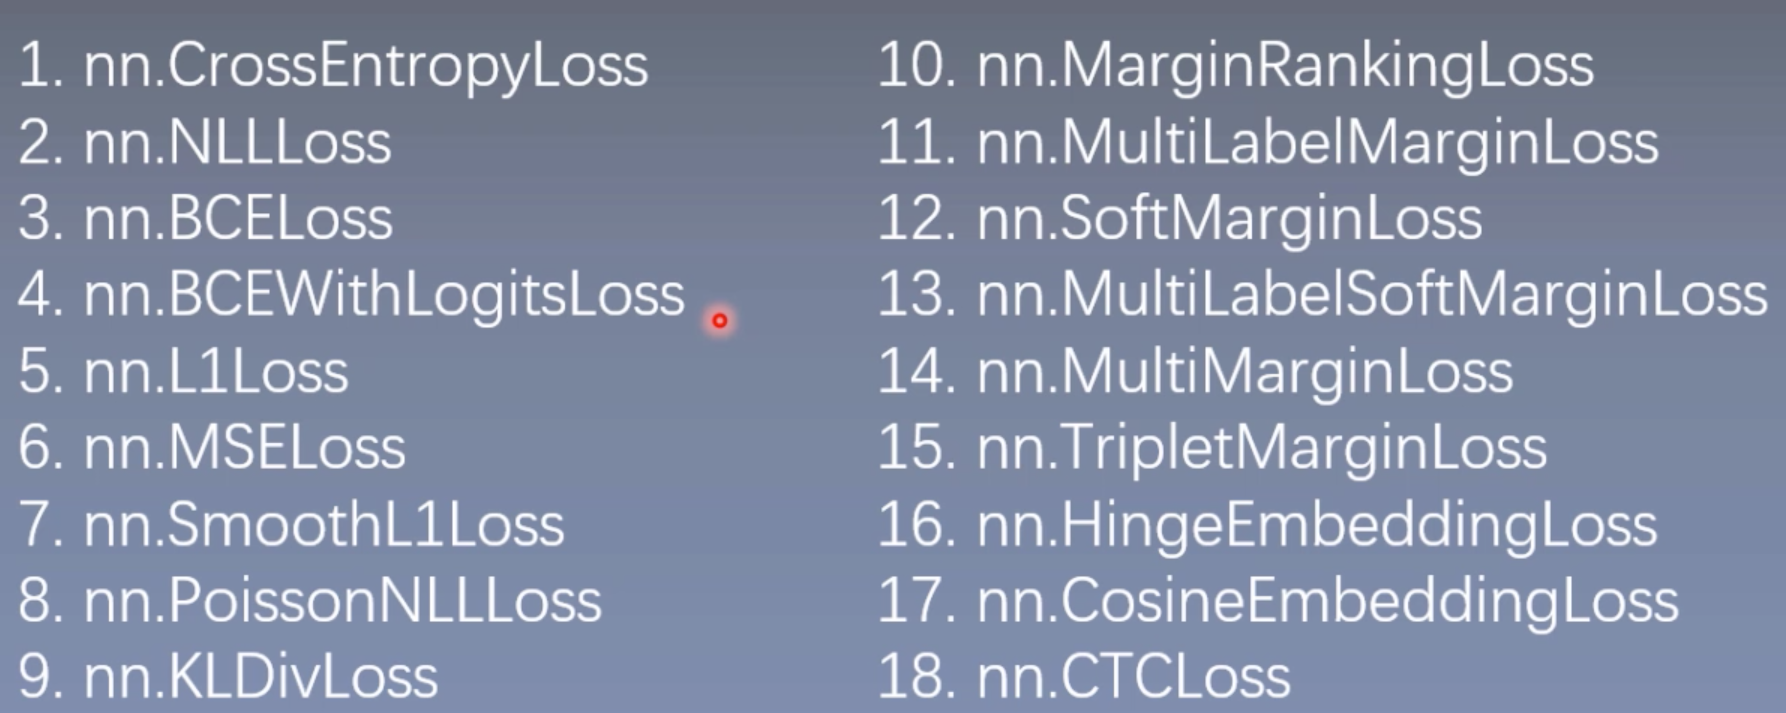

In [66]:
from IPython.display import Image
Image(filename= '/Users/chenmengda/深度之眼/pytorch/pytorch_code/lesson4/损失函数.png')